<a href="https://colab.research.google.com/github/KarpovaSofya/cassava-leaf-disease/blob/main/Cassava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import math, re, os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from kaggle_datasets import KaggleDatasets
from tensorflow import keras
from functools import partial
from sklearn.model_selection import train_test_split
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.0


In [14]:
#cv2 - for image operations
import cv2 as cv2
#reading disease names from provided json file
import json

#visualizations
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

#train-test split
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Не надо
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [15]:
#reading training data
train_df = pd.read_csv('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train.csv')
#maping the class labels mentioned in json file wiht its respective disease name
disease_names = open('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/label_num_to_disease_map.json')
disease_names = json.load(disease_names)

#parse through every label value and identify the disease name based on label number from json file
train_df['disease_name'] = train_df['label'].apply(lambda x: disease_names[str(x)])
#visualize the top five rows from table
train_df.head()

image_id  label                         disease_name
0  1000015157.jpg      0       Cassava Bacterial Blight (CBB)
1  1000201771.jpg      3         Cassava Mosaic Disease (CMD)
2   100042118.jpg      1  Cassava Brown Streak Disease (CBSD)
3  1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)
4  1000812911.jpg      3         Cassava Mosaic Disease (CMD)

In [16]:
fig = make_subplots(rows=1, cols=2,
            specs=[[{"type": "xy"}, {"type": "domain"}]],)
# value_counts: to count number of images in each class with respect to disease_name column
# Bar plot 
t1 = go.Bar(x=train_df['disease_name'].value_counts().index, 
            y=train_df['disease_name'].value_counts().values,
            text=train_df['disease_name'].value_counts().values,
            textposition='auto',name='Count',
           marker_color='indianred')
#Pie chart with labels and counts
t2 = go.Pie(labels=train_df['disease_name'].value_counts().index,
           values=train_df['disease_name'].value_counts().values,
           hole=0.3)
fig.add_trace(t1,row=1, col=1)
fig.add_trace(t2,row=1, col=2)
fig.update_layout(title='Distribution of Class Labels')
fig.show()

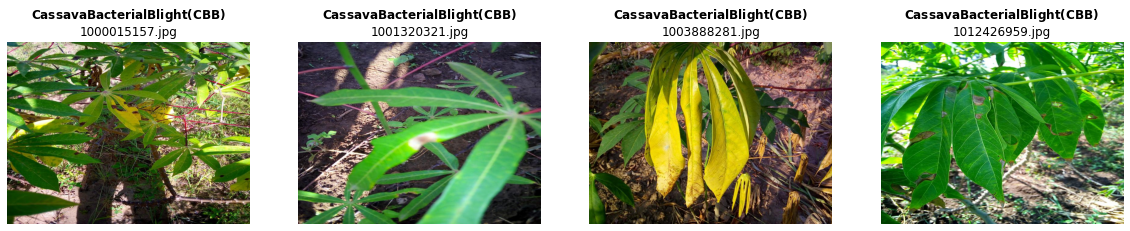

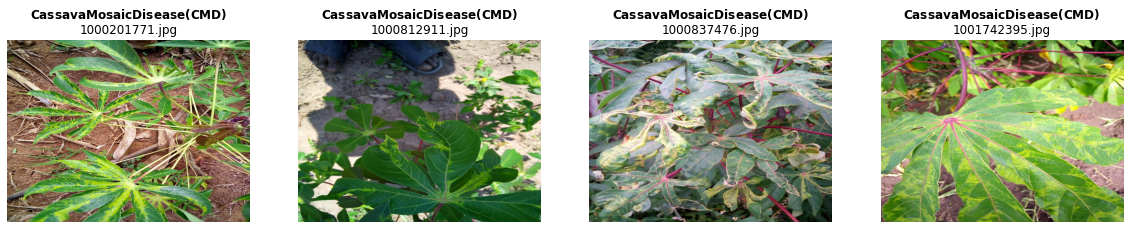

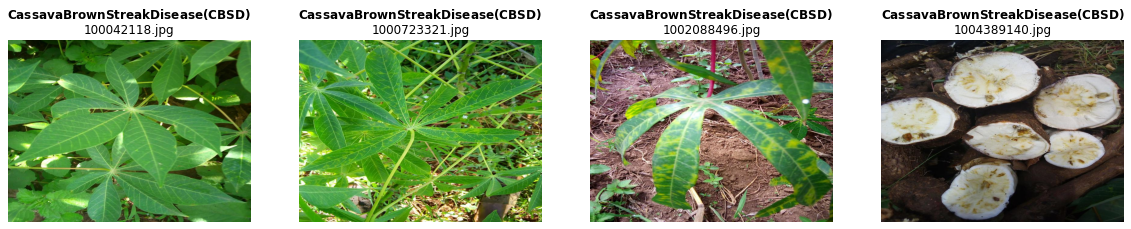

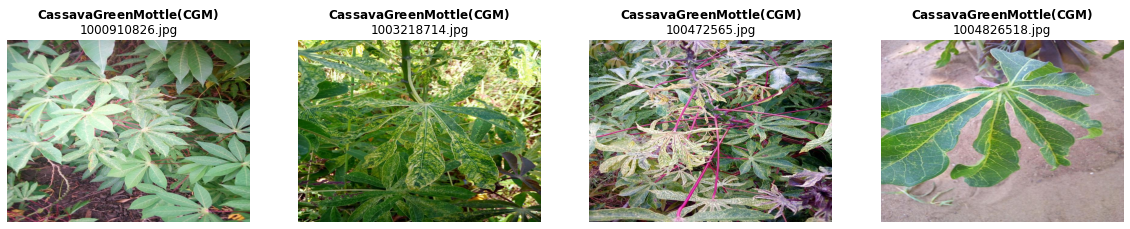

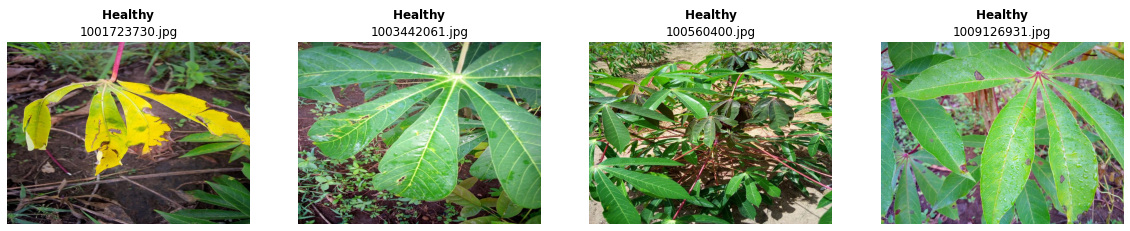

In [17]:
#random seed is used to replicate the same images in every run
np.random.seed(2020)
#plotting 5 random samples for each class with image name and disease name as title
for class_name in train_df['disease_name'].unique():
    plt.figure(figsize=(20,50))
    for idx,img_name in enumerate(train_df[train_df['disease_name'] == class_name]['image_id'].values[:4]):
        plt.subplot(1,4,idx+1)
        #reading the image and converting BGR color space to RGB
        tmp = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+img_name)
        img = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.title(r"$\bf{"+class_name + "}$"+'\n'+img_name )
    plt.show()

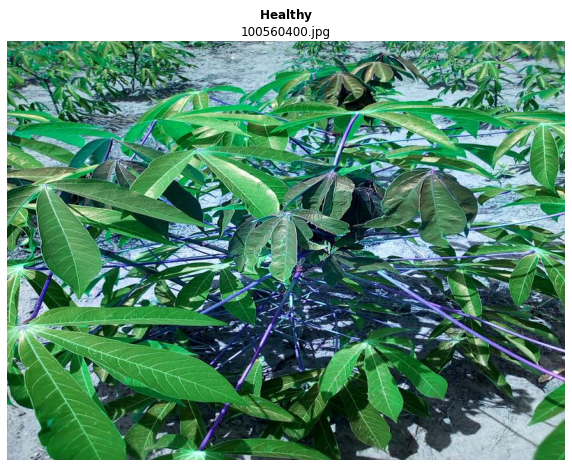

In [ ]:
class_name = 'Healthy'
img_name = train_df[train_df['disease_name'] == class_name]['image_id'].iloc[2]
tmp = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+img_name)
plt.figure(figsize=(10,10))
plt.imshow(tmp)
plt.axis('off')
plt.title(r"$\bf{"+class_name + "}$"+'\n'+img_name)
plt.show()

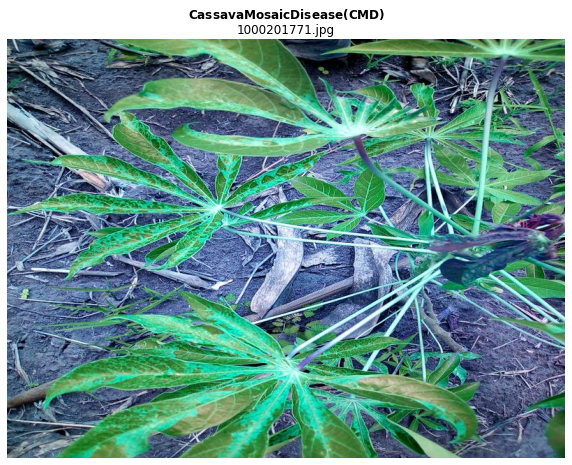

In [ ]:
class_name = 'Cassava Mosaic Disease (CMD)'
img_name = train_df[train_df['disease_name'] == class_name]['image_id'].iloc[0]
tmp = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+img_name)
plt.figure(figsize=(10,10))
plt.imshow(tmp)
plt.axis('off')
plt.title(r"$\bf{"+class_name + "}$"+'\n'+img_name)
plt.show()

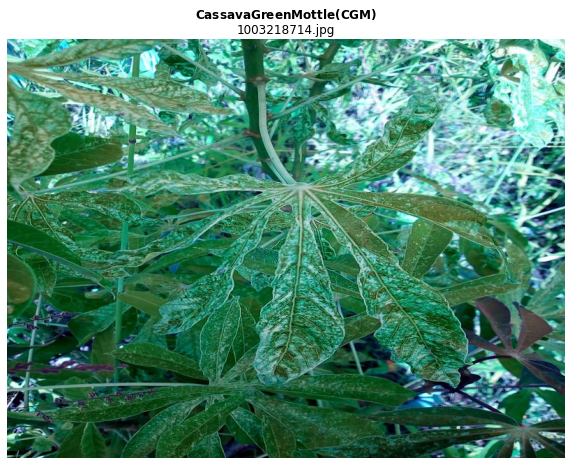

In [ ]:
class_name = 'Cassava Green Mottle (CGM)'
img_name = train_df[train_df['disease_name'] == class_name]['image_id'].iloc[1]
tmp = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+img_name)
plt.figure(figsize=(10,10))
plt.imshow(tmp)
plt.axis('off')
plt.title(r"$\bf{"+class_name + "}$"+'\n'+img_name)
plt.show()

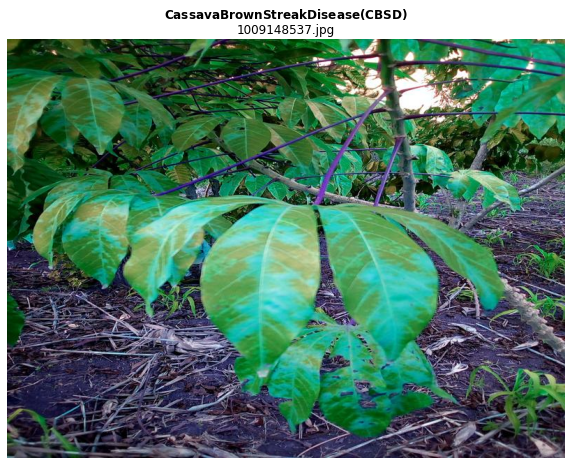

In [ ]:
class_name = 'Cassava Brown Streak Disease (CBSD)'
img_name = train_df[train_df['disease_name'] == class_name]['image_id'].iloc[6]
tmp = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+img_name)
plt.figure(figsize=(10,10))
plt.imshow(tmp)
plt.axis('off')
plt.title(r"$\bf{"+class_name + "}$"+'\n'+img_name)
plt.show()

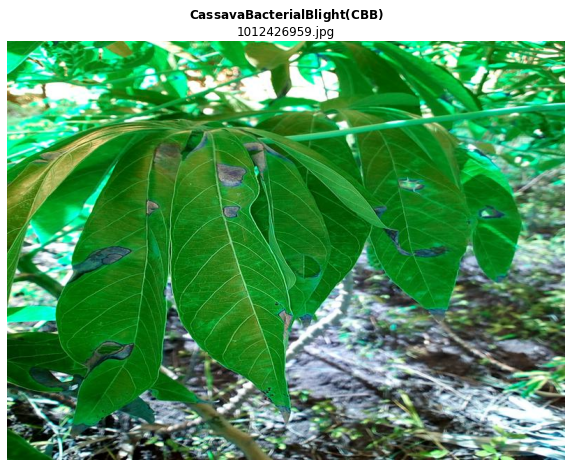

In [ ]:
class_name = 'Cassava Bacterial Blight (CBB)'
img_name = train_df[train_df['disease_name'] == class_name]['image_id'].iloc[3]
tmp = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+img_name)
plt.figure(figsize=(10,10))
plt.imshow(tmp)
plt.axis('off')
plt.title(r"$\bf{"+class_name + "}$"+'\n'+img_name)
plt.show()

# Гистограммы

In [18]:
image_id=train_df['image_id'].iloc[110]
disease_name = train_df['disease_name'].iloc[110]
disease_name

'Cassava Mosaic Disease (CMD)'

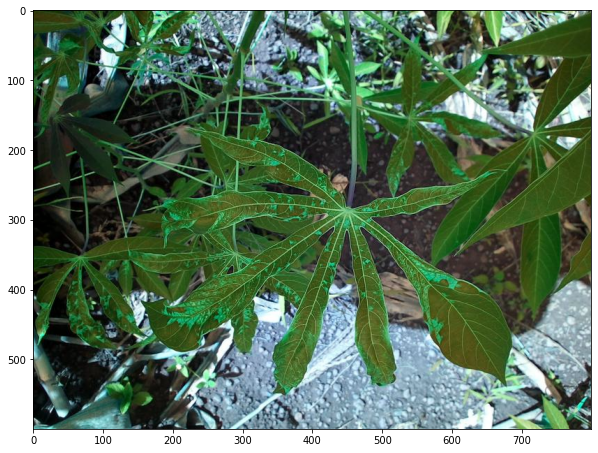

In [19]:
tmp = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+image_id)
plt.figure(figsize=(10,10))
plt.imshow(tmp)
plt.show()

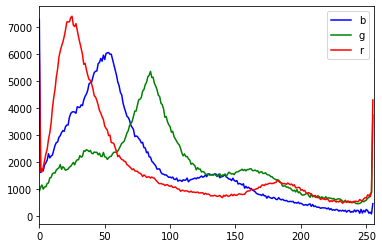

In [ ]:
import cv2 as cv
img = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+image_id)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.legend(color)
plt.show()

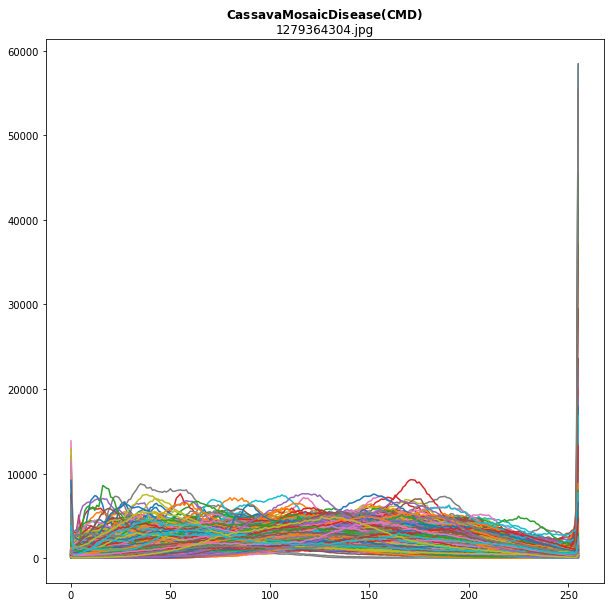

In [ ]:
class_name = disease_name
plt.figure(figsize=(10,10))
for idx,img_name in enumerate(train_df[train_df['disease_name'] == class_name]['image_id'].values[:1000]):
  #reading the image and converting BGR color space to RGB
  tmp = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+img_name)
  hist = cv.calcHist ([tmp], [1], None , [256], [0,256])
  plt.plot(hist)
  plt.title(r"$\bf{"+class_name + "}$"+'\n'+img_name )
plt.show()

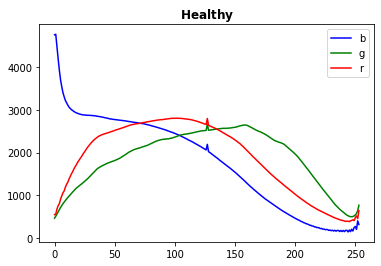

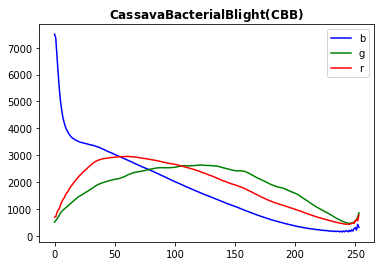

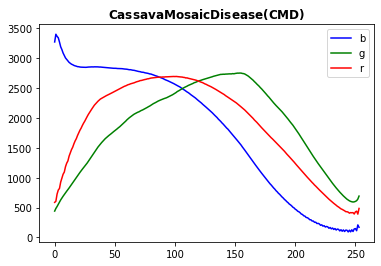

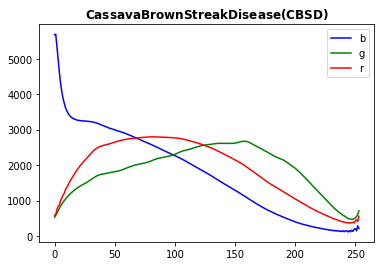

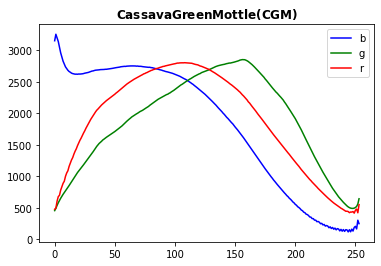

In [ ]:
all_hists = []
for disease_name in list(set(train_df['disease_name'])):

  hist_list_blue = []
  hist_list_green = []
  hist_list_red = []
  class_name = disease_name
  #plt.figure(figsize=(10,10))

  for img_name in train_df[train_df['disease_name'] == class_name]['image_id'].values[:2000]:
    #reading the image and converting BGR color space to RGB
    tmp = cv2.imread('/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/train_images/'+img_name)
    color = ('b','g','r')

    hist_blue = cv.calcHist ([tmp], [0], None , [256], [0,256])
    hist_green = cv.calcHist ([tmp], [1], None , [256], [0,256])
    hist_red = cv.calcHist ([tmp], [2], None , [256], [0,256])
    
    hist_list_blue.append(hist_blue)
    hist_list_green.append(hist_green)
    hist_list_red.append(hist_red)

  hist_list_blue = np.array(hist_list_blue)
  hist_list_green = np.array(hist_list_green)
  hist_list_red = np.array(hist_list_red)

  mean_hist_blue = []
  mean_hist_green = []
  mean_hist_red = []

  for i in range(1,255): # тут отсекаем крайние значения (0 и 255) так как они везде одинаково большие
    mean_hist_blue.append(hist_list_blue[::,i].mean())
    mean_hist_green.append(hist_list_green[::,i].mean())
    mean_hist_red.append(hist_list_red[::,i].mean())
  
  all_hists.append([mean_hist_blue, mean_hist_green, mean_hist_red])
  #plt.subplot(1,indx)
  plt.plot(mean_hist_blue, color='blue')
  plt.plot(mean_hist_green, color='green')
  plt.plot(mean_hist_red, color='red')
  plt.legend(color)
  plt.title(r"$\bf{"+class_name + "}$")
  plt.show()


# Маски и % содержание цветов

In [20]:
def get_mask(file_name, color, type_image):
    file_path = '/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/'+str(type_image) +'/'+str(file_name)
    
    image = cv2.imread(file_path)
    original = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    if color == 'green':
        lower = np.array([36, 0, 0], dtype="uint8")
        upper = np.array([70, 255,255], dtype="uint8")
    if color == 'yellow':
        lower = np.array([0, 150, 10], dtype="uint8")
        upper = np.array([36, 251, 255], dtype="uint8")
    if color == 'violet':
        lower = np.array([56, 0, 28], dtype="uint8")
        upper = np.array([219, 191, 205], dtype="uint8")
    if color == 'orange':
        lower = np.array([18, 40, 90], dtype="uint8")
        upper = np.array([27, 255, 255], dtype="uint8")
    if color == 'brown':
        lower = np.array([30, 34, 45], dtype="uint8")
        upper = np.array([150, 172, 255], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)

    cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(original, (x, y), (x + w, y + h), (36,255,12), 2)

    return mask

In [21]:
def creat_shades_df(data, type_images):
    shades_df = pd.DataFrame(columns=['image_id', 'green', 'yellow', 'violet', 'orange', 'brown'])    

    for image_id in data['image_id'].values:
        green  = np.count_nonzero(get_mask(image_id, 'green' , type_images)==255)
        yellow = np.count_nonzero(get_mask(image_id, 'yellow', type_images)==255) / green
        violet = np.count_nonzero(get_mask(image_id, 'violet', type_images)==255) / green
        orange = np.count_nonzero(get_mask(image_id, 'orange', type_images)==255) / green
        brown  = np.count_nonzero(get_mask(image_id, 'brown' , type_images)==255) / green
        
        df1 = pd.DataFrame([[image_id, green, yellow, violet, orange, brown]], columns=['image_id', 'green', 'yellow', 'violet', 'orange', 'brown'])
        shades_df = pd.concat([shades_df, df1], axis=0)
    return shades_df

In [22]:
type_images = 'train_images'
img_name = train_df['image_id'].values[5]
green  = np.count_nonzero(get_mask(img_name, 'green' , type_images)==255)
green

179899

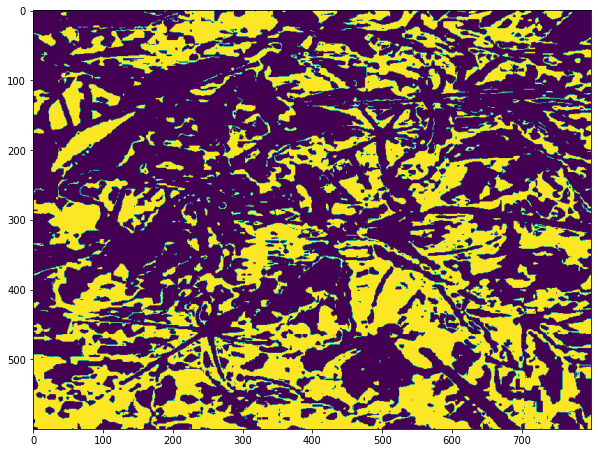

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(get_mask(img_name, 'green' , type_images))
plt.show()

Обработка исходных данных: 3 гистограммы (красный, зелёный, синий) + содержание зелёного + % цветов относительно зелёного цвета (жёлтый, фиолетовый, ораньжевый, коричневый).

In [ ]:
file_path = '/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/'+str(type_image) +'/'+str(file_name)

In [78]:
def preprocess_data(df, dir_path, type_images):
  X = []
  l = len(df)

  hist_blue = []
  hist_green = []
  hist_red = []
  ind = 0

  for img_name in df['image_id'].values[:1000]:
    small = []
      #reading the image and converting BGR color space to RGB
    tmp = cv2.imread(dir_path+str(type_images) +'/'+img_name)

    hist_blue = cv2.calcHist ([tmp], [0], None , [256], [0,256]).reshape(256)[2:254]
    hist_green = cv2.calcHist ([tmp], [1], None , [256], [0,256]).reshape(256)[2:254]
    hist_red = cv2.calcHist ([tmp], [2], None , [256], [0,256]).reshape(256)[2:254]  
    green  = np.count_nonzero(get_mask(img_name, 'green' , type_images)==255)
    yellow = np.count_nonzero(get_mask(img_name, 'yellow', type_images)==255) / green
    violet = np.count_nonzero(get_mask(img_name, 'violet', type_images)==255) / green
    orange = np.count_nonzero(get_mask(img_name, 'orange', type_images)==255) / green
    brown  = np.count_nonzero(get_mask(img_name, 'brown' , type_images)==255) / green
    
    small.extend(hist_blue)
    small.extend(hist_green)
    small.extend(hist_red)
    small.extend([green, yellow, violet, orange, brown])
    X.append(small)
    ind +=1
    if ind % 100 == 0:
      print('Progress: \t' + str(ind) + ' / ' + str(l) + '\n')


  X = pd.DataFrame(X)
  stz = preprocessing.StandardScaler().fit(X)
  X = stz.transform(X)
  Y = df['label'].values[:1000]
  return [X,Y]

In [79]:
dir_path = '/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/'
type_images = 'train_images'

X, Y = preprocess_data(train_df, dir_path, type_images)

Progress: 	100 / 21397

Progress: 	200 / 21397

Progress: 	300 / 21397

Progress: 	400 / 21397

Progress: 	500 / 21397

Progress: 	600 / 21397

Progress: 	700 / 21397

Progress: 	800 / 21397

Progress: 	900 / 21397

Progress: 	1000 / 21397



columns = 761

In [80]:
X

array([[ 1.25169478,  1.25445606,  1.36260764, ..., -0.60743868,
        -0.01865651, -0.89374387],
       [-0.57867882, -0.60920214, -0.62486299, ..., -0.39096133,
         0.10292899, -0.12377066],
       [ 0.07402188,  0.06974479,  0.09408993, ..., -0.30306408,
        -0.50711852, -0.42572455],
       ...,
       [-0.79055551, -0.83529547, -0.89724719, ...,  1.01373686,
        -0.05839648,  0.75322761],
       [-0.75018848, -0.80372689, -0.8649347 , ...,  0.48766648,
        -0.20787277,  0.34411775],
       [-0.40716916, -0.48604019, -0.56957833, ..., -0.13667817,
        -0.4332722 ,  0.12129543]])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2021)

In [82]:
len(X_test)

200

# Сетка

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers

In [83]:
model = Sequential([
  keras.layers.Flatten(input_shape=(1, 761)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dropout(0.15),
  keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
history1 = model.fit(
 X_train, y_train,
 epochs= 30,
 batch_size = 128,
 validation_data = (X_test, y_test)
)

Epoch 1/30
7/7 [==============================] - 1s 53ms/step - loss: 2.3904 - accuracy: 0.4049 - val_loss: 1.3425 - val_accuracy: 0.5950
Epoch 2/30
7/7 [==============================] - 0s 27ms/step - loss: 1.2131 - accuracy: 0.6308 - val_loss: 1.3743 - val_accuracy: 0.4950
Epoch 3/30
7/7 [==============================] - 0s 28ms/step - loss: 1.2245 - accuracy: 0.6084 - val_loss: 1.2599 - val_accuracy: 0.6050
Epoch 4/30
7/7 [==============================] - 0s 29ms/step - loss: 1.0945 - accuracy: 0.6493 - val_loss: 1.3121 - val_accuracy: 0.6050
Epoch 5/30
7/7 [==============================] - 0s 28ms/step - loss: 1.0940 - accuracy: 0.6705 - val_loss: 1.4458 - val_accuracy: 0.4550
Epoch 6/30
7/7 [==============================] - 0s 27ms/step - loss: 1.1975 - accuracy: 0.5779 - val_loss: 1.2433 - val_accuracy: 0.5900
Epoch 7/30
7/7 [==============================] - 0s 30ms/step - loss: 1.0023 - accuracy: 0.6794 - val_loss: 1.2507 - val_accuracy: 0.5750
Epoch 8/30
7/7 [===========

In [85]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = [e for e in range(1, len(acc) + 1)]

fig = make_subplots(rows=1, cols=2,subplot_titles=['Accuracy', 'Loss'],
            specs=[[{"type": "xy"}, {"type": "xy"}]],)

t1 = go.Scatter(x=epochs,y=acc,name='Training',mode='markers+lines',line={'color': 'blue'})
t2 = go.Scatter(x=epochs,y=val_acc,name='Validation',mode='markers+lines',line={'dash': 'dash','color': 'red'})

t3 = go.Scatter(x=epochs,y=loss,name='Training',mode='markers+lines',line={'color': 'blue'},showlegend=False)
t4 = go.Scatter(x=epochs,y=val_loss,name='Validation',mode='markers+lines',line={'dash': 'dash','color': 'red'},showlegend=False)

fig.add_trace(t1,row=1, col=1)
fig.add_trace(t2,row=1, col=1)

fig.add_trace(t3,row=1, col=2)
fig.add_trace(t4,row=1, col=2)

fig.update_layout(title='Training History')
fig.show()

# Prediction

In [86]:
ss = pd.read_csv(dir_path+'sample_submission.csv')
dir_path = '/content/drive/MyDrive/Cassava/cassava-leaf-disease-classification.zip (Unzipped Files)/'
type_images = 'test_images'
X_p, Y_p = preprocess_data(ss, dir_path, type_images)

pred = model.predict(X_p)
pred = list(map(lambda x: np.argmax(x), pred))
pred

ss['label'] = pred
ss.to_csv('submission.csv', index = False)

In [87]:
ss

image_id  label
0  2216849948.jpg      3

In [88]:
# Это просто для проверки
X_p, Y_p = preprocess_data(train_df.head(10), dir_path, 'train_images')
pred = model.predict(X_p)
pred = list(map(lambda x: np.argmax(x), pred))
pred

[3, 3, 3, 1, 3, 3, 3, 0, 0, 3]

Лучшее, что пока получилось

In [ ]:
model = Sequential([
  keras.layers.Flatten(input_shape=(1, 761)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.15),
  keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
 X_train, y_train,
 epochs= 30,
 batch_size = 128,
 validation_data = (X_test, y_test)
)

Epoch 1/30
134/134 [==============================] - 4s 33ms/step - loss: 1.2511 - accuracy: 0.6015 - val_loss: 1.1285 - val_accuracy: 0.6259
Epoch 2/30
134/134 [==============================] - 4s 31ms/step - loss: 1.1212 - accuracy: 0.6217 - val_loss: 1.1408 - val_accuracy: 0.6194
Epoch 3/30
134/134 [==============================] - 4s 31ms/step - loss: 1.0897 - accuracy: 0.6308 - val_loss: 1.0733 - val_accuracy: 0.6325
Epoch 4/30
134/134 [==============================] - 4s 31ms/step - loss: 1.0696 - accuracy: 0.6339 - val_loss: 1.0561 - val_accuracy: 0.6355
Epoch 5/30
134/134 [==============================] - 4s 31ms/step - loss: 1.0642 - accuracy: 0.6333 - val_loss: 1.0199 - val_accuracy: 0.6390
Epoch 6/30
134/134 [==============================] - 4s 31ms/step - loss: 1.0531 - accuracy: 0.6367 - val_loss: 1.0360 - val_accuracy: 0.6390
Epoch 7/30
134/134 [==============================] - 4s 32ms/step - loss: 1.0422 - accuracy: 0.6372 - val_loss: 1.0323 - val_accuracy: 0.6397

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [e for e in range(1, len(acc) + 1)]

fig = make_subplots(rows=1, cols=2,subplot_titles=['Accuracy', 'Loss'],
            specs=[[{"type": "xy"}, {"type": "xy"}]],)

t1 = go.Scatter(x=epochs,y=acc,name='Training',mode='markers+lines',line={'color': 'blue'})
t2 = go.Scatter(x=epochs,y=val_acc,name='Validation',mode='markers+lines',line={'dash': 'dash','color': 'red'})

t3 = go.Scatter(x=epochs,y=loss,name='Training',mode='markers+lines',line={'color': 'blue'},showlegend=False)
t4 = go.Scatter(x=epochs,y=val_loss,name='Validation',mode='markers+lines',line={'dash': 'dash','color': 'red'},showlegend=False)

fig.add_trace(t1,row=1, col=1)
fig.add_trace(t2,row=1, col=1)

fig.add_trace(t3,row=1, col=2)
fig.add_trace(t4,row=1, col=2)

fig.update_layout(title='Training History')
fig.show()